<a href="https://colab.research.google.com/github/Jcrt/dcc127-data-mining/blob/main/Trabalho_2_Grupo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dados = pd.read_csv("/content/drive/MyDrive/DCC127/trabalho2_dados_7.csv")

In [ ]:
import pandas as pd

dados['lancamentoFormatado'] = pd.to_datetime(dados['lancamento'],format='%d-%b-%y', errors='coerce')

print("Inicio:", dados["lancamentoFormatado"].min())
print("Fim:", dados["lancamentoFormatado"].max())

Inicio: 2005-03-15 00:00:00
Fim: 2014-06-24 00:00:00


#Quantidade de jogos por plataforma

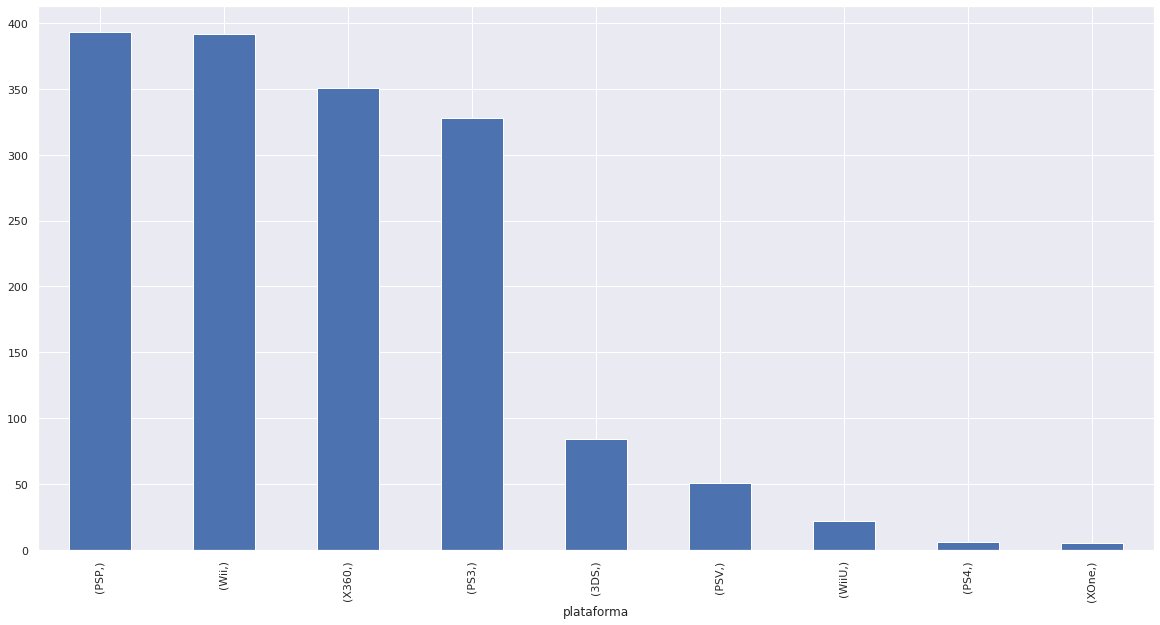

In [ ]:
import matplotlib.pyplot as plt

dados[['plataforma']].value_counts().plot.bar(figsize=(20,10))
plt.show()

#Gráfico de quantidade de vendas por gênero de jogo.

Em geral jogos de ação e tiro são os mais vendidos, enquanto os de estratégia e quebra-cabeça são os menos vendidos.

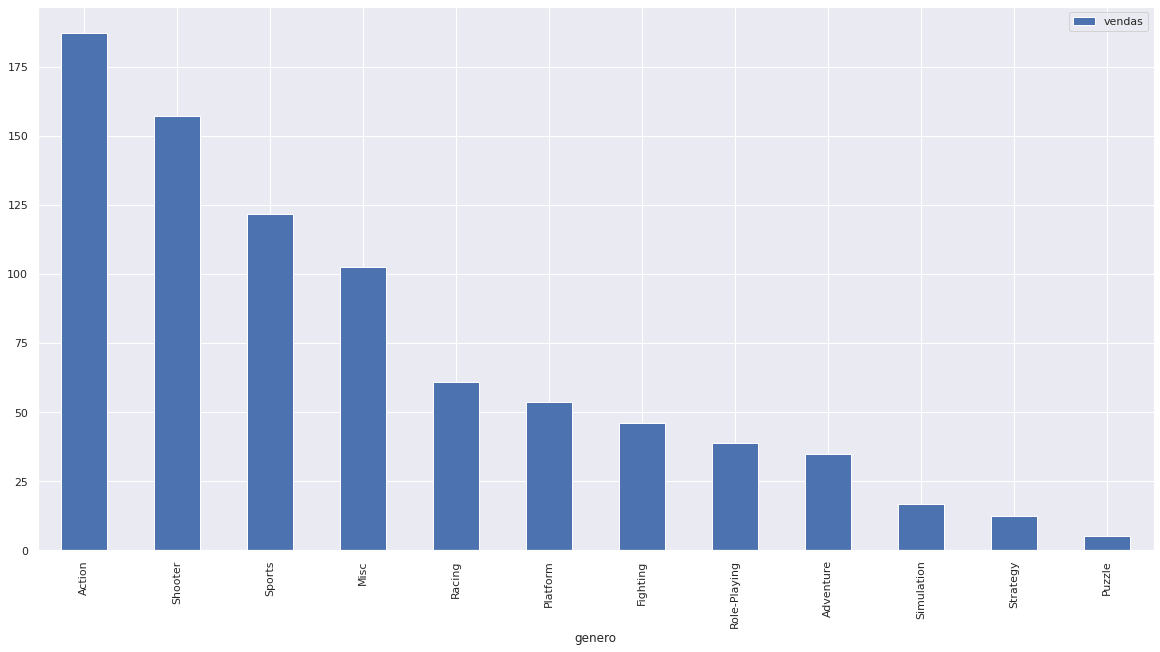

In [ ]:
import matplotlib.pyplot as plt

dados[['genero', 'vendas']].groupby('genero').sum().sort_values(ascending=False,by='vendas').plot.bar(figsize=(20,10))
plt.show()

#Gráfico de quantidade de vendas por plataforma.

Em geral jogos de ação e tiro são os mais vendidos, enquanto os de estratégia e quebra-cabeça são os menos vendidos.

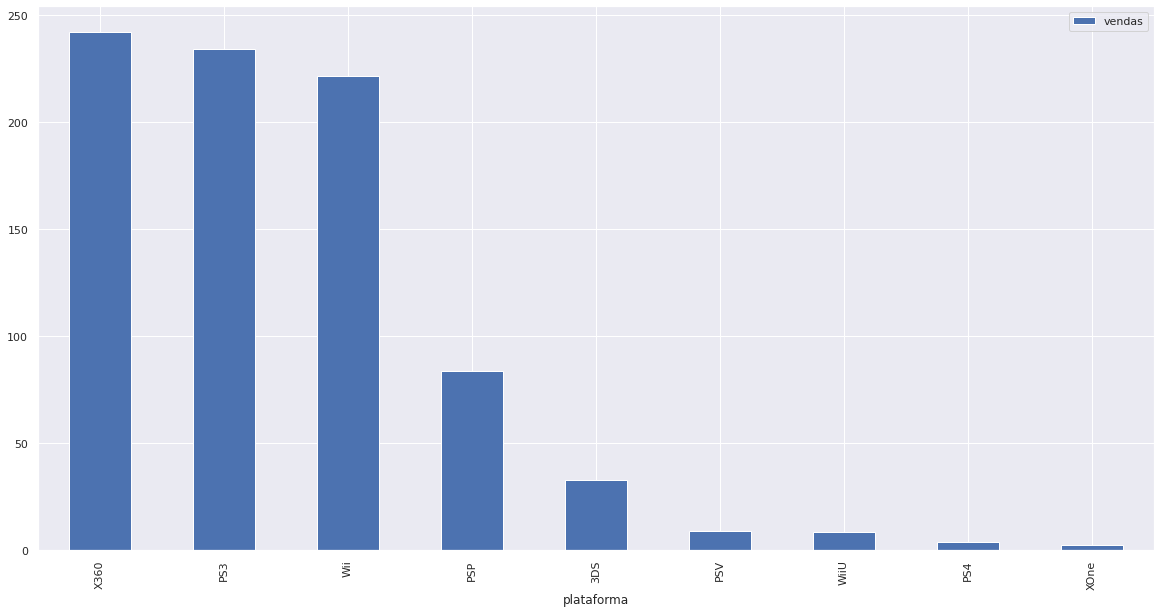

In [ ]:
import matplotlib.pyplot as plt

dados[['plataforma', 'vendas']].groupby('plataforma').sum().sort_values(ascending=False,by='vendas').plot.bar(figsize=(20,10))
plt.show()

#Gráfico de quantidade de vendas por plataforma e gênero
Esse gráfico ajuda a saber quais gêneros fazem mais sucesso em cada plataforma: no PS3 e X360 fazem mais sucesso ação e tiro, enquanto no Wii é "misc" e esportes

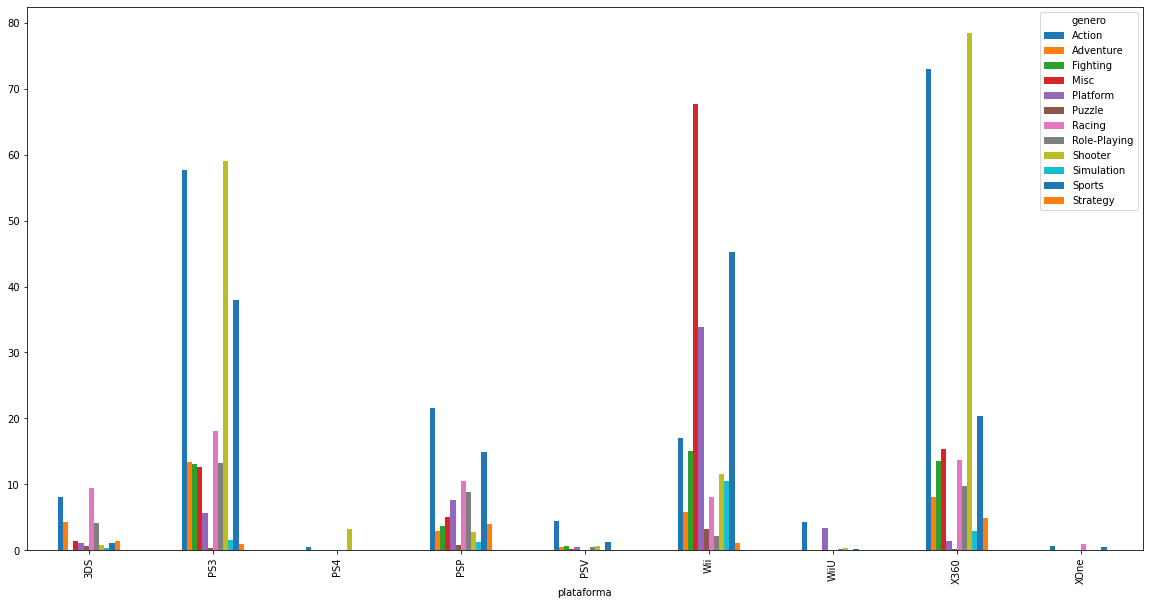

In [ ]:
import matplotlib.pyplot as plt

dados[["genero", "plataforma", "vendas"]].dropna().groupby(["plataforma", "genero"]).sum().pivot_table(index='plataforma', columns='genero', values='vendas').plot.bar(figsize=(20,10))
plt.show()

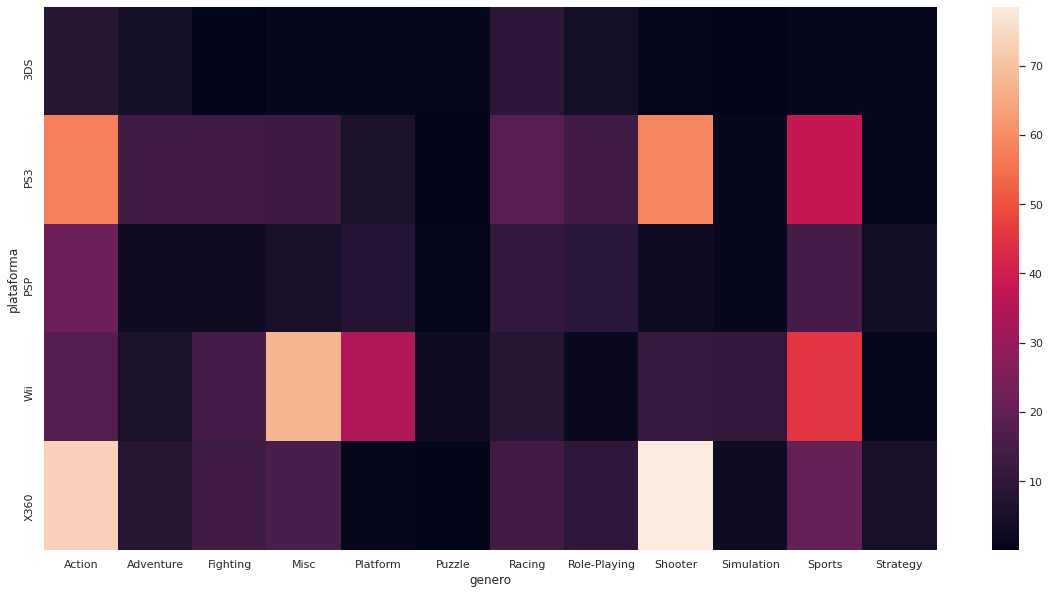

In [ ]:
import seaborn as sns

matriz = dados[["genero", "plataforma", "vendas"]].dropna().groupby(["plataforma", "genero"]).sum().pivot_table(index='plataforma', columns='genero', values='vendas')
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(matriz.dropna())

#Boxplot de relação entre a avaliação dos críticos e o gênero
Revelou que jogos de plataforma normalmente são melhor avaliados, jogos de ação possuem um grande espalhamento dos dados, o que mostra um considerável número de notas altas e baixas, além de nos apresentar alguns outliers.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


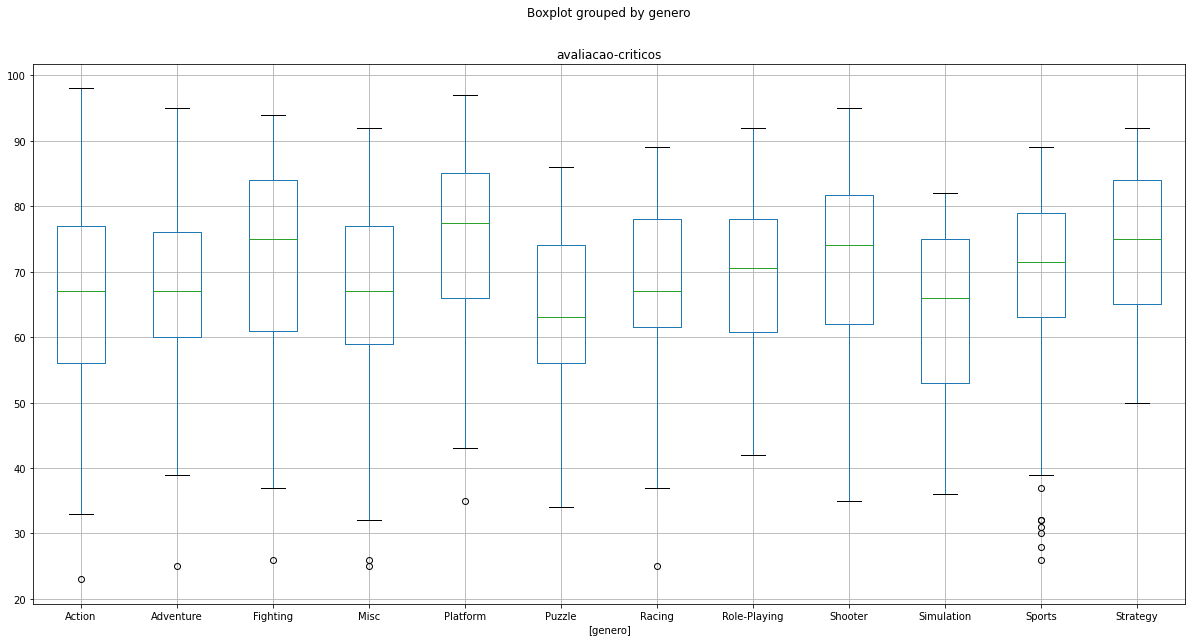

In [ ]:
import matplotlib.pyplot as plt

dados[["genero", "avaliacao-criticos"]].boxplot(by="genero",figsize=(20,10))
plt.show()

#Gráfico indicando avaliação média de avaliação de críticos (azul) e  usuários (laranja).
Nesse grágico foi necessário tratar o dado de avaliação de usuários, além de possuir campos que não continham uma nota, também estava de 0 à 10, enquanto a nota dos críticos estava de 0 à 100.
É possível verificar que os dados no PS3 e XOne possuem bastante divergência entre as avaliações dos usuários e dos críticos, mas acreditamos que seja devido a pouca quantidade de jogos dessas plataformas.

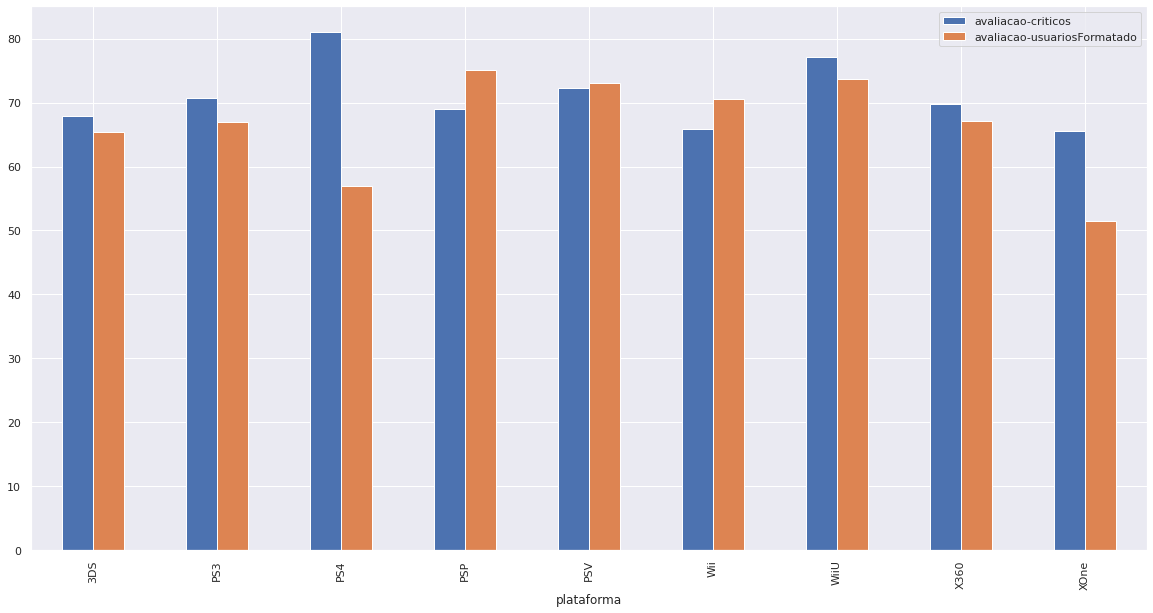

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dados["avaliacao-usuariosFormatado"] = pd.to_numeric(dados["avaliacao-usuarios"], errors='coerce')
dados['avaliacao-usuariosFormatado'] = [i * 10 for i in dados['avaliacao-usuariosFormatado']]

dados[["plataforma", "avaliacao-criticos", "avaliacao-usuariosFormatado"]].dropna().groupby(["plataforma"]).mean().plot.bar(figsize=(20,10))
plt.show()


#Gráfico de vendas por plataforma
Conseguimos verificar que poucos jogos vendem acima do índice 5 (milhões?), e são mais comuns nas plataformas que mais vendem jogos, que são PS3, Wii e X360.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


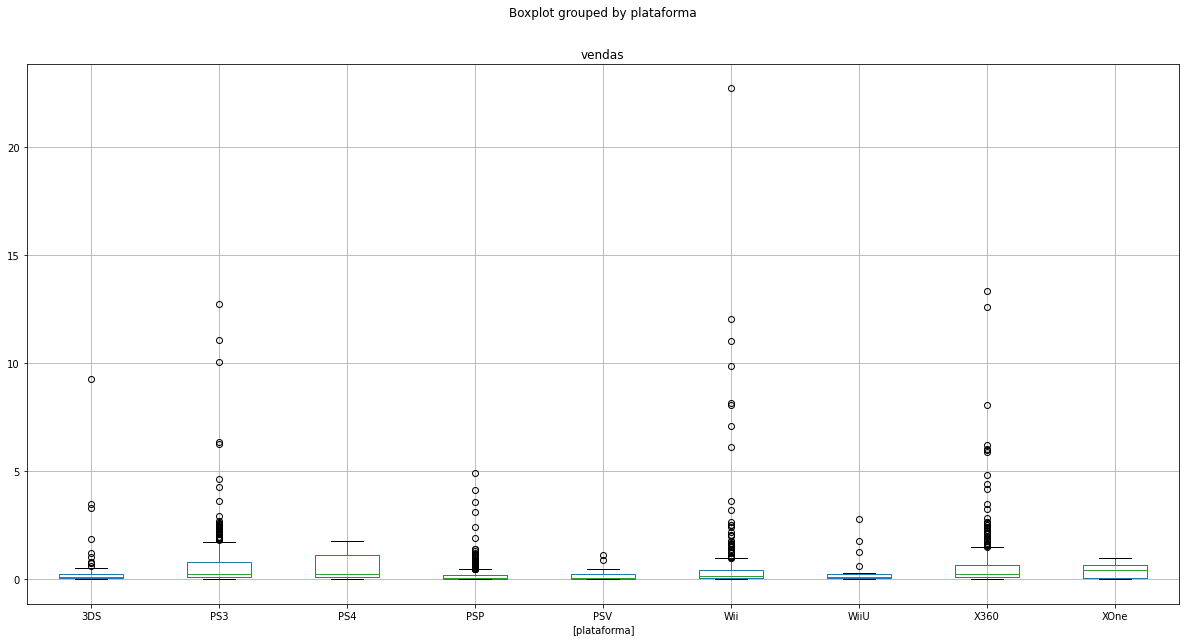

In [ ]:
import matplotlib.pyplot as plt

dados[["plataforma", "vendas"]].boxplot(by="plataforma",figsize=(20,10))
plt.show()